<a href="https://colab.research.google.com/github/samuel127jules/es22452/blob/main/Lab2ES2245.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

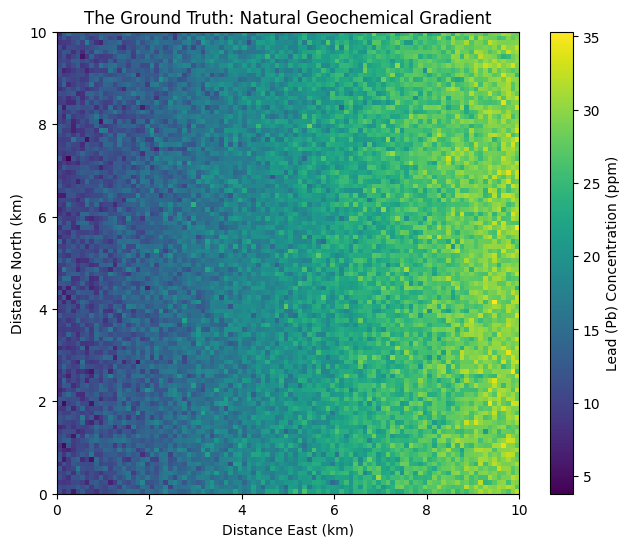

In [ ]:
x = np.linspace(0, 10, 100)
y = np.linspace(0,10, 100)
X, Y = np.meshgrid(x, y)

true_Pb = 10 + (2.0 * X) + np.random.normal(0, 2, (100,100))

plt.figure(figsize = (8,6))
plt.imshow(true_Pb, origin='lower', extent=[0,10,0,10], cmap='viridis')
plt.colorbar(label='Lead (Pb) Concentration (ppm)')
plt.title("The Ground Truth: Natural Geochemical Gradient")
plt.xlabel("Distance East (km)")
plt.ylabel("Distance North (km)")
plt.show()


In [ ]:
mask_A = np.where(X>8)
mask_B = np.where(X<2)

pop_A = true_Pb[mask_A]
pop_B = true_Pb[mask_B]

print(np.shape(pop_A))

(2000,)


In [ ]:
sample_A = np.random.choice(pop_A, size=50)
sample_B = np.random.choice(pop_B, size=50)

t_stat, p_val = stats.ttest_ind(sample_A, sample_B)

print(f"Mean Pb (Near Road): {sample_A.mean():.2f}")
print(f"Mean Pb (Nature Reserve): {sample_B.mean():.2f}")
print(f"P-value: {p_val:.10f}")

Mean Pb (Near Road): 28.23
Mean Pb (Nature Reserve): 11.95
P-value: 0.0000000000


The p-value is likely extremely small (significant). Explain precisely why this result is scientifically invalid, even though the math is correct.

Because there is not enough movement in the data for the p-value to be greater than 0, a p-value of 0 means that it is insignificant change regardless of the correctness.

[np.float64(0.7898052324451794), np.float64(0.3505719584829087), np.float64(0.34956799392961346), np.float64(0.7945344582761772), np.float64(0.3395912067830301), np.float64(0.6582980267605836), np.float64(0.5631127571997249), np.float64(0.04412763493425448), np.float64(0.958096719094351), np.float64(0.6329401168253725), np.float64(0.688622651853535), np.float64(0.2372290939026258), np.float64(0.7612598526878106), np.float64(0.35471154078909173), np.float64(0.3265112020597227), np.float64(0.7243354198320109), np.float64(0.0027733354392965206), np.float64(0.2506682448688791), np.float64(0.9412617899588042), np.float64(0.18495868685809025), np.float64(0.42397501426265505), np.float64(0.08669618950256316), np.float64(0.4487919626665824), np.float64(0.8558881025091407), np.float64(0.7367922612070119), np.float64(0.8963649082208146), np.float64(0.42190248623188786), np.float64(0.0020241279899653403), np.float64(0.9125246865267878), np.float64(0.08574219865483793), np.float64(0.04528130704721

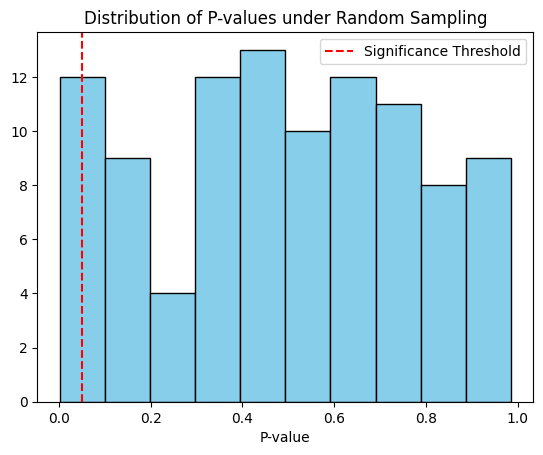

In [ ]:
all_soil_data = true_Pb.flatten()

p_values = []

for i in range(0,100):
  sample_A = np.random.choice(all_soil_data, 50)
  sample_B = np.random.choice(all_soil_data, 50)
  t_stat, p_value = stats.ttest_ind(sample_A, sample_B)
  p_values.append(p_value)

print(p_values)

p_arr = np.array(p_values)
false_positives = np.sum(p_arr < 0.05)

print(f"Total Experiments: 100")
print(f"Number of False Positives (p < 0.05): {false_positives}")
print("Expected False Positives: ~5")

plt.hist(p_arr, bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of P-values under Random Sampling")
plt.xlabel("P-value")
plt.axvline(0.05, color='red', linestyle='--', label='Significance Threshold')
plt.legend()
plt.show()

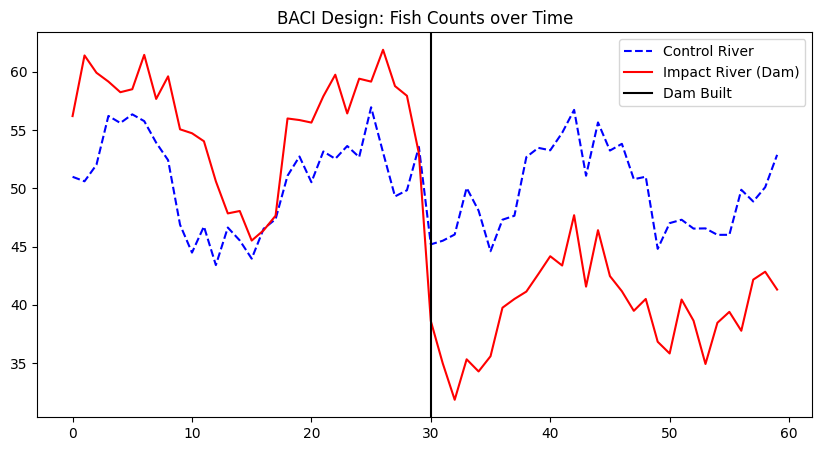

In [ ]:
time = np.arange(0, 60)
seasonality = np.sin(time/3)*5
control_river_noise = np.random.normal(0, 2, 60)
control_river = 50 + seasonality + control_river_noise
dam_effect = np.zeros(len(time))
dam_effect[30:] = -15
impact_river_noise = np.random.normal(0, 2, 60)
impact_river = 55 + seasonality + dam_effect + impact_river_noise

plt.figure(figsize=(10,5))
plt.plot(time, control_river, label='Control River', color='blue', linestyle='--')
plt.plot(time, impact_river, label='Impact River (Dam)', color='red')
plt.axvline(30, color='black', label='Dam Built')
plt.title("BACI Design: Fish Counts over Time")
plt.legend()
plt.show()

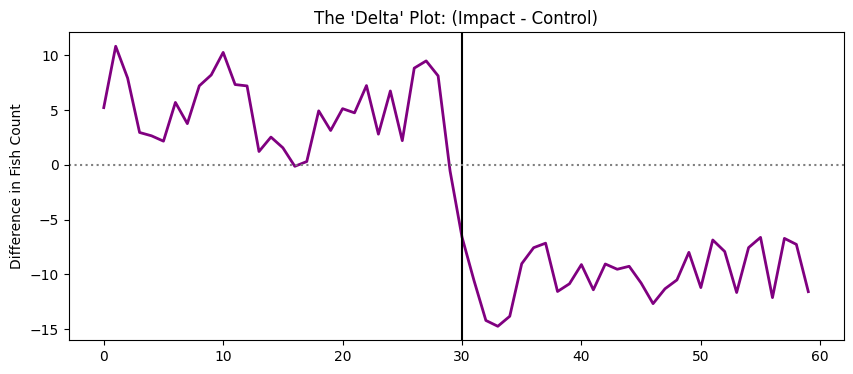

In [ ]:
difference = impact_river - control_river

plt.figure(figsize=(10,4))
plt.plot(time, difference, color='purple', linewidth=2)
plt.axvline(30, color='black', label='Dam Built')
plt.axhline(0, color='gray', linestyle=':')
plt.title("The 'Delta' Plot: (Impact - Control)")
plt.ylabel("Difference in Fish Count")
plt.show()

In [ ]:
from numpy._core.defchararray import upper
data_raw = np.array([2.9, 3.1, 3.0, 2.8, 3.2, 3.0, 3.1, 30.0, 2.9, 3.0])

def clean_data(arr):
  med = np.median(arr)
  std = np.std(arr)
  lower_limit = med - (2 * std)
  upper_limit = med + (2 * std)
  mask_lower = arr >= lower_limit
  mask_upper = arr <= upper_limit
  clean_arr = arr[mask_lower & mask_upper]
  return clean_arr


data_clean = clean_data(data_raw)

print(f"Original Mean: {data_raw.mean():.2f}")
print(f"Cleaned Mean:  {data_clean.mean():.2f}")

if data_clean.max() < 4.0:
    print("SUCCESS: Outlier removed.")
else:
    print("FAIL: Outlier still present.")

Original Mean: 5.70
Cleaned Mean:  3.00
SUCCESS: Outlier removed.


Why did we use the Median to set the center of our filter, rather than the Mean?

The median wouldn't change with an outlier.